<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-Python/blob/main/EXAMPLE_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title: Blending system 

Author: Juan Manuel 

Date: February 2012

### 1. Process description 

We have a reactor with two inflow rates. We want specify the mass fraction at the output $x_{sp}$. Then, it is necessary to set the value of $w_2$ in the inflow rate. Let's see what is the value of $w_2$ necessary to obtain a specific value $x_{sp}$

### 2. Assumptions 

* The denstiy in the reactor is contant 
* Only exsit two species, A and B, in the inflow rate $w_1$ and A in the inflow rate B
* The compusition in the reactor is homogeneous
* The temperature is constant 

### 3. Scheme of the process

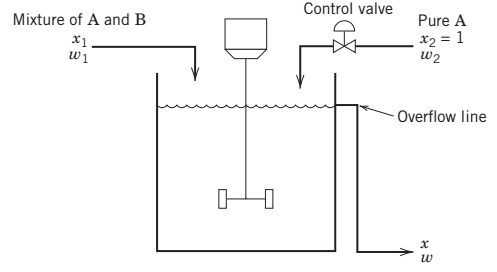

#### Process network

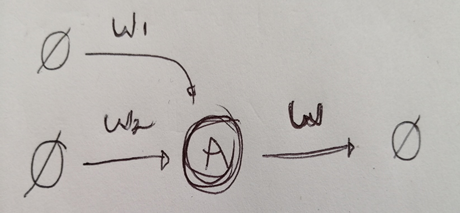

Figure 1

In the Fig. 1 we can see the scheme of the process and the process network. In the process network it is possible to see the variable in our system and how it is generated and eliminated in the system 

### 4. Data of the process

* $x_2 = 1$

### 5. Analysis 

In [ ]:
# load libraries 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

#### 5.1 Establish the model 

Total mass balance 

$$ \frac{d(\rho V)}{dt} =  w_1 +  w_2 -  w $$

since $\rho$ is constant we have 

$$
\frac{dV}{dt} = \frac{w_1 +  w_2 - w}{\rho} \tag{1}
$$

Mass balance for A

$$ \frac{d(\rho V x )}{dt} =  w_1 x_1 +  w_2 x_2 - w x $$

$$  \rho  \frac{d(V x )}{dt} =  w_1 x_1 +  w_2 x_2 - w x $$

$$  \rho (x\frac{dV}{dt} + V \frac{dx}{dt}) =  w_1 x_1 +  w_2 x_2 - w x $$

$$  \rho (x\frac{dV}{dt} + V \frac{dx}{dt}) =  w_1 x_1 +  w_2 x_2 - w x $$

$$  \rho (x (\frac{w_1 +  w_2 - w}{\rho}) + V \frac{dx}{dt}) =  w_1 x_1 +  w_2 x_2 - w x $$

$$
\frac{dx}{dt} = \frac{1}{\rho V} [w_1(x_1 - x) + w_2(x_2 - x)] \tag{2}
$$

#### 5.2 Find steady state 

In order to find the stady state of the system, we must calculate the critical point equating to zero the differential equations (1) and (2)

For equation (1) we have 

$$
w_1 + w_2 - w = 0 \tag{3}
$$ 

For equation (2) we have 

$$
\frac{1}{\rho V} [w_1(x_1 - x) + w_2(x_2 - x)] = 0 \hspace{0.5cm}  \rightarrow w_1(x_1 - x) + w_2(x_2 - x) = 0 \tag{4}
$$

Solving (3) and (4) we get 

$$
\bar{x} = \frac{w_1 x_1 + w_2 x_2}{w_1 + w_2} \tag{5}
$$

So (5) tells us that if we want a specific value of $x$ in the output we neet to set first the value of $w_1$, $x_1$, $w_2$ and $x_2$ 


In [ ]:
# write the model 
def blending(s, times, input):

    # state variables
    V = s[0]
    x = s[1]

    # inputs
    w1 = input[0]
    w2 = input[1]
    w = input[2]
    x1 = input[3]

    # operational parameters
    rho = 1
    x2 = x2ss

    # total mass balance 
    dVdt = (w1 + w2 - w)/rho

    # mass balance for A
    dxdt = (w1*(x1 - x) + w2*(x2 - x))/(rho*V)

    return [dVdt, dxdt]

#### 5.3 Perform simulation

In [ ]:
# nominal values 
w1ss = 10
w2ss = 10
wss = 20
x1ss = 0.2
x2ss = 1
xss = 0.6
Vss = 100

In [ ]:
# set initial conditions 
s = [100, 0.6] # L , ---
# set integration time 
time = np.linspace(0,20,100) # h
# set input values 
input = [w1ss, w2ss, wss, x1ss] # kg/h, kg/h, kg/h, ---

In [ ]:
# simulate model 
out = odeint(blending, s, time, args= (input,))
V = out[:,0]
x = out[:,1]

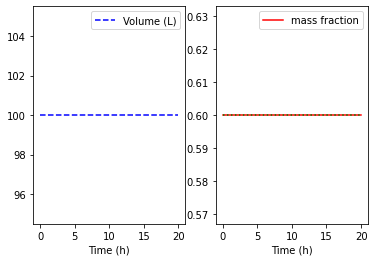

In [ ]:
# show simulation
plt.subplot(1,2,1)
plt.plot(time, V, "b--")
plt.xlabel("Time (h)")
plt.legend(["Volume (L)"])
plt.subplot(1,2,2)
plt.plot(time, x, "r-")
plt.xlabel("Time (h)")
plt.legend(["mass fraction"])
plt.plot(time, np.repeat(0.6,100), "g:")

In [ ]:
# lets calculate the statedy state 
def steady_sate(input):  

    x_bar = (w1ss * x1ss + w2ss * x2ss)/(w1ss + w2ss)

    return x_bar

In [ ]:
# yeah, 0.6 is the steady state for these inputs
steady_sate(input)

0.6

Design Question. If the nominal value of $x_1$ is $\bar{x}_1$, what nominal ﬂow rate $\bar{w}_2$ is required to produce the desired outlet concentration, $x_{sp}$?

In [ ]:
def manipulated_w2(xsp):

    #  design equation for the blending system
    w2 = w1ss*(xsp - x1ss)/(x2ss-xsp) 

    return w2

In [ ]:
manipulated_w2(0.6)

9.999999999999998

Control Question. Suppose that inlet concentration $x_1$ varies with time. How can we ensure that the outlet composition $x$ remains at or near its desired value, $x_{sp}$?

In [ ]:
# disturbance variable
x1 = np.ones(len(time))*0.2
x1[25:75] = 0.5

In [ ]:
# vectors to save the state
V = np.ones(len(time))*Vss
x = np.ones(len(time))*xss
w2 = np.ones(len(time))*w2ss
s = [Vss, xss]
input = [10,10,20,0.2]

#### Method 1. Measure x and adjust w2. It is reasonable to measure controlled variable x and then adjust w2 accordingly


$$w_2(t) = \bar{w}_2 + K_c [x_{sp} - x(t)]$$



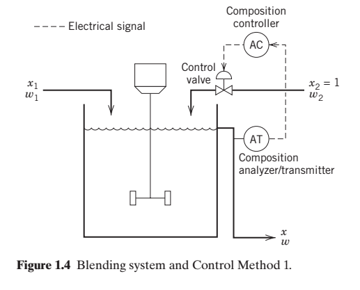

In [ ]:
# for cycle to simulate with different x1
for i in range(len(time)-1):
  # update time span
  ts = [time[i], time[i+1]]
  # solve ODEs
  #input[3] = x1[i+1]
  #w2[i+1] = w2ss + 500*(xss - x[i])
  input[1] = w2[i+1]
  out = odeint(blending,s,ts,args=(input,))
  # Guardar resultados
  V[i+1] = out[-1][0]
  x[i+1] = out[-1][1]
  # Ajustar condiciones iniciales para el siguiente ciclo
  s = out[-1]

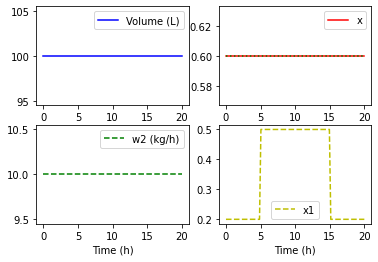

In [ ]:
#@title show simulation
plt.subplot(2,2,1)
plt.plot(time, V, "b-")
plt.xlabel("Time (h)")
plt.legend(["Volume (L)"])
plt.subplot(2,2,2)
plt.plot(time, x, "r-")
plt.xlabel("Time (h)")
plt.legend(["x"])
plt.plot(time, np.repeat(0.6,100), "g:")
plt.subplot(2,2,3)
plt.plot(time, w2, "g--")
plt.xlabel("Time (h)")
plt.legend(["w2 (kg/h)"])
plt.subplot(2,2,4)
plt.plot(time, x1, "y--")
plt.xlabel("Time (h)")
plt.legend(["x1"])

### Example 1 
A stirred-tank blending process with a constant liquid
holdup of 2 m3 is used to blend two streams whose densities are both approximately 900 kg/m3. The density does
not change during mixing.

a) Assume that the process has been operating for a long period of time with ﬂow rates of w1 = 500 kg/min and w2 = 200 kg/min, and feed compositions (mass fractions) of x1 = 0.4 and x2 = 0.75. What is the steadystate value of x?

Let's calculate the steady state conditions equating the DE to zero

$$\frac{d(\rho V)}{dt} = w_1 + w_2 - w = 0 \hspace{0.5cm} \rightarrow \hspace{0.5cm}w = w_1 + w_2$$

$$\frac{d(\rho V x)}{dt} = w_1 x_1 + w_2 x_2 - w \bar{x} = 0 \hspace{0.5cm} \rightarrow \hspace{0.5cm} \bar{x} = \frac{w_1 x_1 + w_2 x_2}{w_1 + w_2}$$

$$\bar{x} = \frac{500 * 0.4 + 200 * 0.75}{500 + 200} = 0.5$$

b) Suppose that w1 changes suddenly from 500 to 400 kg/min and remains at the new value. Determine an expression for x(t) and plot it

We must consider that volume remains constant so the system simplifies to 

$$\frac{d(\rho V x)}{dt} = w_1 x_1 + w_2 x_2 - w x $$

$$ \rho V\frac{dx}{dt} = w_1 x_1 + w_2 x_2 - w x $$

$$ \frac{dx}{dt} + \frac{w}{\rho V}x = \frac{w_1 x_1 + w_2 x_2}{\rho V} $$

With the initial condition $x(0) = 0.5$

So the solution is 

$$ x(t) = 0.5 e^{\frac{-w}{\rho V}t} + \frac{w_1 x_1 + w_2 x_2}{w_1 + w_2} (1 - e^{\frac{-w}{\rho V}t})$$

Considering $w_1 = 400$ kg/min we have 

$$ x(t) = 0.5 e^{-\frac{t}{3}} + 0.517 (1 - e^{-\frac{t}{3}})$$

(c) Repeat part (b) for the case where w2 (instead of w1) changes suddenly from 200 to 100 kg/min and remains there.

Considering $w_2 = 100$ kg/min and $w_1 = 500$ kg/min we have 

$$ x(t) = 0.5 e^{-\frac{t}{3}} + 0.458 (1 - e^{-\frac{t}{3}})$$

(d) Repeat part (c) for the case where x1 suddenly changes from 0.4 to 0.6 (in addition to the change in w2).

$$\frac{500*0.6 + 100*0.75}{600} = 0.625$$

then 

$$ x(t) = 0.5 e^{-\frac{t}{3}} + 0.625 (1 - e^{-\frac{t}{3}})$$

(e) For parts (b) through (d), plot the normalized response $x_N(t)$,

$$x_N(t) = \frac{x(t) - x(0)}{x(\infty) - x(0)}$$

In [ ]:
def x_trans(t, x_ini, C):

    x = x_ini*np.exp(-t/3) + C*(1 - np.exp(-t/3))

    return x

In [ ]:
def x_norm(t,x_ini,C):

    x_inf =  C

    x = x_trans(t,x_ini,C)

    xn = (x - x_ini) /(x_inf - x_ini)

    return xn

In [ ]:
t = np.linspace(0,15,100)
xbt = x_trans(t, 0.5, 0.517)
xct = x_trans(t, 0.5, 0.458)
xdt = x_trans(t, 0.5, 0.625)

In [ ]:
t = np.linspace(0,15,100)
xb = x_norm(t, 0.5, 0.517)
xc = x_norm(t, 0.5, 0.458)
xd = x_norm(t, 0.5, 0.625)

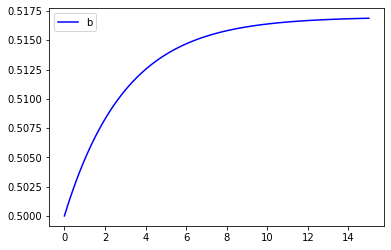

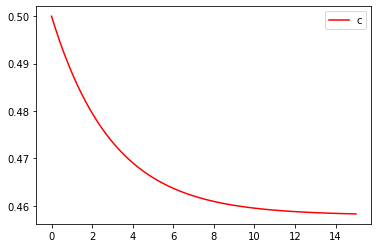

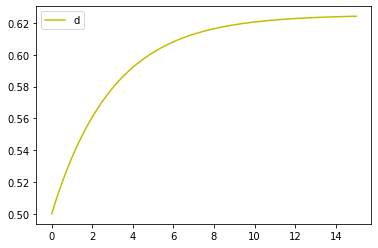

In [ ]:
# plot lines 
plt.plot(t, xbt,"b" ,label = "b") 
plt.legend() 
plt.show()
plt.plot(t, xct, "r",label = "c") 
plt.legend() 
plt.show()
plt.plot(t, xdt, "y",label = "d") 
plt.legend() 
plt.show()

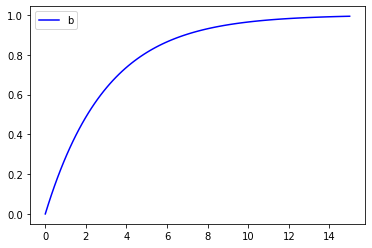

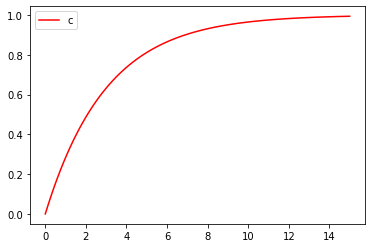

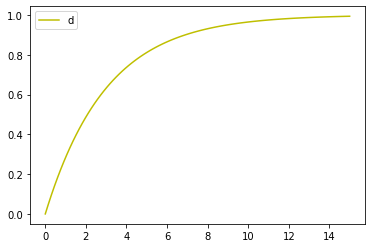

In [ ]:
# plot lines 
plt.plot(t, xb,"b" ,label = "b") 
plt.legend() 
plt.show()
plt.plot(t, xc, "r",label = "c") 
plt.legend() 
plt.show()
plt.plot(t, xd, "y",label = "d") 
plt.legend() 
plt.show()